In [1]:
import os
import pickle
import sys
sys.path.append('..')
from mtDNAsim import *

/home/wangkun/mtDNA_simulation/scripts/../mtDNAsim/sim_utils.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
from ete3 import Tree
from Bio import Phylo
from io import StringIO
import re
import seaborn as sns

In [3]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [4]:
from tqdm.notebook import tqdm

In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['font.size'] = 12
plt.rcParams['pdf.fonttype'] = 42

In [31]:
rf_data = pd.DataFrame()
path = '/data3/wangkun/mtsim_res/20240903/'
for model in os.listdir(path):
    if model == 'test':
        continue
    for simid in os.listdir(f'{path}/{model}'):
        try:
            rft = pd.read_csv(f'{path}/{model}/{simid}/rf_dist.txt', sep='\t')
            rf_data = pd.concat((rf_data, rft),ignore_index=True)
        except:
            pass

In [35]:
rf_data['seq'][rf_data['seq']!='_seq'] = 'no'

/tmp/ipykernel_84762/157854779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_data['seq'][rf_data['seq']!='_seq'] = 'no'


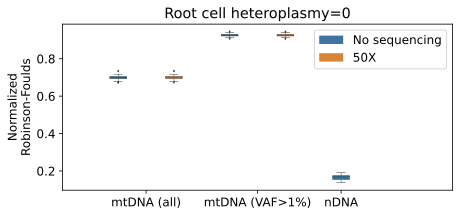

In [89]:
generation = 30
heterp = 0
rf_tmp = rf_data[rf_data['model']==f'const_{heterp}']
bp_dat = []
for cutoff in [0, 0.01]:
    for seq in ['no', '_seq']:
        rf_tmp_1 = rf_tmp[(rf_tmp['seq']==seq)&(rf_tmp['gen']==generation)&(rf_tmp['type']=='mtDNA')&(rf_tmp['cutoff']==cutoff)]
        bp_dat.append(np.array(rf_tmp_1['rf']/rf_tmp_1['maxrf']).flatten())
        
rf_tmp_1 = rf_tmp[(rf_tmp['gen']==30)&(rf_tmp['type']=='nDNA')]
bp_dat.append(np.array(rf_tmp_1['rf']/rf_tmp_1['maxrf']).flatten())

colors=sns.color_palette(['tab:blue','tab:orange','tab:blue','tab:orange','tab:blue','tab:orange'])
fig, ax = plt.subplots(figsize=(7,3))
ax = sns.boxplot(bp_dat, ax=ax, width=0.3, palette=colors, linewidth=0.5, fliersize=1)
ax.set_ylabel('Normalized\nRobinson-Foulds')

ax.set_xlim((-1,6))

legend_elements = []

legend_elements.append(Patch(facecolor='#3f73a0',label='No sequencing'))
legend_elements.append(Patch(facecolor='#da8436',label='50X'))
ax.legend(handles=legend_elements, loc=1)
ax.set_xticks([0.5, 2.5, 4], ['mtDNA (all)', 'mtDNA (VAF>1%)', 'nDNA'])
ax.set_title(f'Root cell heteroplasmy={heterp}')
plt.savefig(f'../figs/rf_boxplot_{generation}_{heterp}.svg')

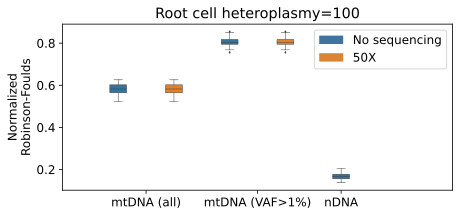

In [90]:
generation = 30
heterp = 100
rf_tmp = rf_data[rf_data['model']==f'const_{heterp}']
bp_dat = []
for cutoff in [0, 0.01]:
    for seq in ['no', '_seq']:
        rf_tmp_1 = rf_tmp[(rf_tmp['seq']==seq)&(rf_tmp['gen']==generation)&(rf_tmp['type']=='mtDNA')&(rf_tmp['cutoff']==cutoff)]
        bp_dat.append(np.array(rf_tmp_1['rf']/rf_tmp_1['maxrf']).flatten())
        
rf_tmp_1 = rf_tmp[(rf_tmp['gen']==30)&(rf_tmp['type']=='nDNA')]
bp_dat.append(np.array(rf_tmp_1['rf']/rf_tmp_1['maxrf']).flatten())

colors=sns.color_palette(['tab:blue','tab:orange','tab:blue','tab:orange','tab:blue','tab:orange'])
fig, ax = plt.subplots(figsize=(7,3))
ax = sns.boxplot(bp_dat, ax=ax, width=0.3, palette=colors, linewidth=0.5, fliersize=1)
ax.set_ylabel('Normalized\nRobinson-Foulds')

ax.set_xlim((-1,6))

legend_elements = []

legend_elements.append(Patch(facecolor='#3f73a0',label='No sequencing'))
legend_elements.append(Patch(facecolor='#da8436',label='50X'))
ax.legend(handles=legend_elements, loc=1)
ax.set_xticks([0.5, 2.5, 4], ['mtDNA (all)', 'mtDNA (VAF>1%)', 'nDNA'])
ax.set_title(f'Root cell heteroplasmy={heterp}')
plt.savefig(f'../figs/rf_boxplot_{generation}_{heterp}.svg')

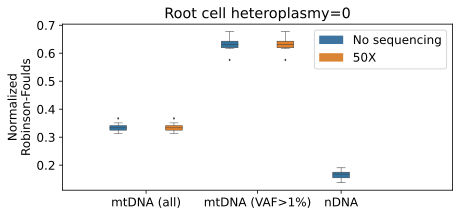

In [91]:
generation = 130
heterp = 0
rf_tmp = rf_data[rf_data['model']==f'const_{heterp}']
bp_dat = []
for cutoff in [0, 0.01]:
    for seq in ['no', '_seq']:
        rf_tmp_1 = rf_tmp[(rf_tmp['seq']==seq)&(rf_tmp['gen']==generation)&(rf_tmp['type']=='mtDNA')&(rf_tmp['cutoff']==cutoff)]
        bp_dat.append(np.array(rf_tmp_1['rf']/rf_tmp_1['maxrf']).flatten())
        
rf_tmp_1 = rf_tmp[(rf_tmp['gen']==30)&(rf_tmp['type']=='nDNA')]
bp_dat.append(np.array(rf_tmp_1['rf']/rf_tmp_1['maxrf']).flatten())

colors=sns.color_palette(['tab:blue','tab:orange','tab:blue','tab:orange','tab:blue','tab:orange'])
fig, ax = plt.subplots(figsize=(7,3))
ax = sns.boxplot(bp_dat, ax=ax, width=0.3, palette=colors, linewidth=0.5, fliersize=1)
ax.set_ylabel('Normalized\nRobinson-Foulds')

ax.set_xlim((-1,6))

legend_elements = []

legend_elements.append(Patch(facecolor='#3f73a0',label='No sequencing'))
legend_elements.append(Patch(facecolor='#da8436',label='50X'))
ax.legend(handles=legend_elements, loc=1)
ax.set_xticks([0.5, 2.5, 4], ['mtDNA (all)', 'mtDNA (VAF>1%)', 'nDNA'])
ax.set_title(f'Root cell heteroplasmy={heterp}')
plt.savefig(f'../figs/rf_boxplot_{generation}_{heterp}.svg')

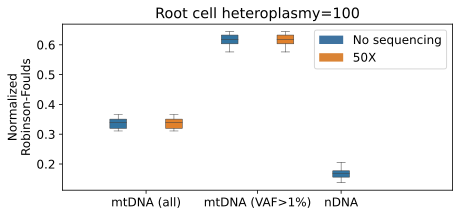

In [92]:
generation = 130
heterp = 100
rf_tmp = rf_data[rf_data['model']==f'const_{heterp}']
bp_dat = []
for cutoff in [0, 0.01]:
    for seq in ['no', '_seq']:
        rf_tmp_1 = rf_tmp[(rf_tmp['seq']==seq)&(rf_tmp['gen']==generation)&(rf_tmp['type']=='mtDNA')&(rf_tmp['cutoff']==cutoff)]
        bp_dat.append(np.array(rf_tmp_1['rf']/rf_tmp_1['maxrf']).flatten())
        
rf_tmp_1 = rf_tmp[(rf_tmp['gen']==30)&(rf_tmp['type']=='nDNA')]
bp_dat.append(np.array(rf_tmp_1['rf']/rf_tmp_1['maxrf']).flatten())

colors=sns.color_palette(['tab:blue','tab:orange','tab:blue','tab:orange','tab:blue','tab:orange'])
fig, ax = plt.subplots(figsize=(7,3))
ax = sns.boxplot(bp_dat, ax=ax, width=0.3, palette=colors, linewidth=0.5, fliersize=1)
ax.set_ylabel('Normalized\nRobinson-Foulds')

ax.set_xlim((-1,6))

legend_elements = []

legend_elements.append(Patch(facecolor='#3f73a0',label='No sequencing'))
legend_elements.append(Patch(facecolor='#da8436',label='50X'))
ax.legend(handles=legend_elements, loc=1)
ax.set_xticks([0.5, 2.5, 4], ['mtDNA (all)', 'mtDNA (VAF>1%)', 'nDNA'])
ax.set_title(f'Root cell heteroplasmy={heterp}')
plt.savefig(f'../figs/rf_boxplot_{generation}_{heterp}.svg')

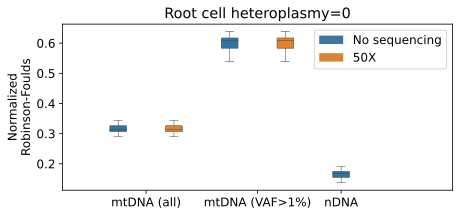

In [93]:
generation = 330
heterp = 0
rf_tmp = rf_data[rf_data['model']==f'const_{heterp}']
bp_dat = []
for cutoff in [0, 0.01]:
    for seq in ['no', '_seq']:
        rf_tmp_1 = rf_tmp[(rf_tmp['seq']==seq)&(rf_tmp['gen']==generation)&(rf_tmp['type']=='mtDNA')&(rf_tmp['cutoff']==cutoff)]
        bp_dat.append(np.array(rf_tmp_1['rf']/rf_tmp_1['maxrf']).flatten())
        
rf_tmp_1 = rf_tmp[(rf_tmp['gen']==30)&(rf_tmp['type']=='nDNA')]
bp_dat.append(np.array(rf_tmp_1['rf']/rf_tmp_1['maxrf']).flatten())

colors=sns.color_palette(['tab:blue','tab:orange','tab:blue','tab:orange','tab:blue','tab:orange'])
fig, ax = plt.subplots(figsize=(7,3))
ax = sns.boxplot(bp_dat, ax=ax, width=0.3, palette=colors, linewidth=0.5, fliersize=1)
ax.set_ylabel('Normalized\nRobinson-Foulds')

ax.set_xlim((-1,6))

legend_elements = []

legend_elements.append(Patch(facecolor='#3f73a0',label='No sequencing'))
legend_elements.append(Patch(facecolor='#da8436',label='50X'))
ax.legend(handles=legend_elements, loc=1)
ax.set_xticks([0.5, 2.5, 4], ['mtDNA (all)', 'mtDNA (VAF>1%)', 'nDNA'])
ax.set_title(f'Root cell heteroplasmy={heterp}')
plt.savefig(f'../figs/rf_boxplot_{generation}_{heterp}.svg')

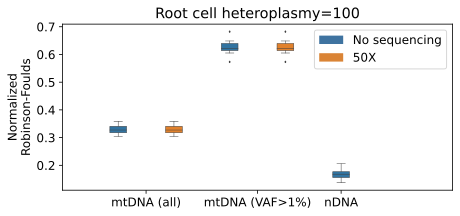

In [94]:
generation = 330
heterp = 100
rf_tmp = rf_data[rf_data['model']==f'const_{heterp}']
bp_dat = []
for cutoff in [0, 0.01]:
    for seq in ['no', '_seq']:
        rf_tmp_1 = rf_tmp[(rf_tmp['seq']==seq)&(rf_tmp['gen']==generation)&(rf_tmp['type']=='mtDNA')&(rf_tmp['cutoff']==cutoff)]
        bp_dat.append(np.array(rf_tmp_1['rf']/rf_tmp_1['maxrf']).flatten())
        
rf_tmp_1 = rf_tmp[(rf_tmp['gen']==30)&(rf_tmp['type']=='nDNA')]
bp_dat.append(np.array(rf_tmp_1['rf']/rf_tmp_1['maxrf']).flatten())

colors=sns.color_palette(['tab:blue','tab:orange','tab:blue','tab:orange','tab:blue','tab:orange'])
fig, ax = plt.subplots(figsize=(7,3))
ax = sns.boxplot(bp_dat, ax=ax, width=0.3, palette=colors, linewidth=0.5, fliersize=1)
ax.set_ylabel('Normalized\nRobinson-Foulds')

ax.set_xlim((-1,6))

legend_elements = []

legend_elements.append(Patch(facecolor='#3f73a0',label='No sequencing'))
legend_elements.append(Patch(facecolor='#da8436',label='50X'))
ax.legend(handles=legend_elements, loc=1)
ax.set_xticks([0.5, 2.5, 4], ['mtDNA (all)', 'mtDNA (VAF>1%)', 'nDNA'])
ax.set_title(f'Root cell heteroplasmy={heterp}')
plt.savefig(f'../figs/rf_boxplot_{generation}_{heterp}.svg')

In [ ]:
bp_dat = []
gen = 400
meth = 'ml'
colors=sns.color_palette(['tab:blue','tab:blue','tab:orange','tab:orange','tab:blue','tab:orange'])
for s in [0.1, 0.9]:
    for cf in [0,0.01]:
        dat_tmp = rf_all[(rf_all['dat']=='mtDNA') & (rf_all['meth']==meth) & (rf_all['gen']==gen) & (rf_all['s']==s)& (rf_all['cutoff']==cf)]
        dat_tmp = dat_tmp['rf']/dat_tmp['maxrf']
        bp_dat.append(list(dat_tmp.to_numpy()))


for s in [0.1, 0.9]:
        dat_tmp = rf_all[(rf_all['dat']=='nDNA') & (rf_all['meth']==meth) & (rf_all['gen']==gen) & (rf_all['s']==s)]
        dat_tmp = dat_tmp['rf']/dat_tmp['maxrf']
        dat_tmp = dat_tmp[-19:]
        bp_dat.append(list(dat_tmp.to_numpy()))
        
fig, ax = plt.subplots(figsize=(7,3))
ax = sns.boxplot(bp_dat, ax=ax, width=0.3, palette=colors)
ax.set_ylabel('Normalized\nRobinson-Foulds')
ax.tick_params(axis='x', rotation=30)
# for i in range(1, 4):
#     ax.vlines(9*i-0.5, 0, 1, color='black')
ax.set_xlim((-1,6))
# ax.set_ylim((0.3,0.9))
legend_elements = []

legend_elements.append(Patch(facecolor='#3f73a0',label='Strong selection'))
legend_elements.append(Patch(facecolor='#da8436',label='Weak selection'))
ax.legend(handles=legend_elements)

ax.set_xticklabels([
    'mtDNA (all)', 'mtDNA (VAF>1%)', 'mtDNA (all)', 'mtDNA (VAF>1%)', 'nDNA', 'nDNA'
]);

In [356]:
rf_const = pd.DataFrame()
for i in os.listdir('/data3/wangkun/mtsim_res/240705/linear_const'):
    rft = pd.read_csv(f'/data3/wangkun/mtsim_res/240705/linear_const/{i}/rf_dist.txt', sep='\t')
    rf_const = pd.concat((rf_const, rft),ignore_index=True)

In [357]:
rf_bn = pd.DataFrame()
for i in os.listdir('/data3/wangkun/mtsim_res/240705/linear_'):
    rft = pd.read_csv(f'/data3/wangkun/mtsim_res/240705/linear_/{i}/rf_dist.txt', sep='\t')
    rf_bn = pd.concat((rf_bn, rft),ignore_index=True)

In [374]:
rf_all = pd.DataFrame()
for i in os.listdir('/data3/wangkun/mtsim_res/240705/linear_const'):
    rft = pd.read_csv(f'/data3/wangkun/mtsim_res/240705/linear_const/{i}/rf_dist.txt', sep='\t')
    rf_all = pd.concat((rf_all, rft),ignore_index=True)
for i in os.listdir('/data3/wangkun/mtsim_res/240705/linear_'):
    rft = pd.read_csv(f'/data3/wangkun/mtsim_res/240705/linear_/{i}/rf_dist.txt', sep='\t')
    rf_all = pd.concat((rf_all, rft),ignore_index=True)  

In [375]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['font.size'] = 12
plt.rcParams['pdf.fonttype'] = 42

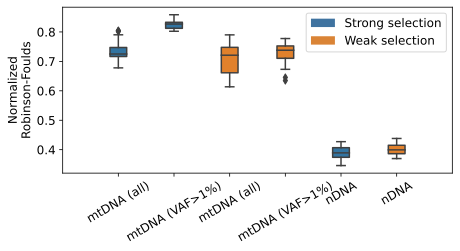

In [377]:
bp_dat = []
gen = 400
meth = 'ml'
colors=sns.color_palette(['tab:blue','tab:blue','tab:orange','tab:orange','tab:blue','tab:orange'])
for s in [0.1, 0.9]:
    for cf in [0,0.01]:
        dat_tmp = rf_all[(rf_all['dat']=='mtDNA') & (rf_all['meth']==meth) & (rf_all['gen']==gen) & (rf_all['s']==s)& (rf_all['cutoff']==cf)]
        dat_tmp = dat_tmp['rf']/dat_tmp['maxrf']
        bp_dat.append(list(dat_tmp.to_numpy()))


for s in [0.1, 0.9]:
        dat_tmp = rf_all[(rf_all['dat']=='nDNA') & (rf_all['meth']==meth) & (rf_all['gen']==gen) & (rf_all['s']==s)]
        dat_tmp = dat_tmp['rf']/dat_tmp['maxrf']
        dat_tmp = dat_tmp[-19:]
        bp_dat.append(list(dat_tmp.to_numpy()))
        
fig, ax = plt.subplots(figsize=(7,3))
ax = sns.boxplot(bp_dat, ax=ax, width=0.3, palette=colors)
ax.set_ylabel('Normalized\nRobinson-Foulds')
ax.tick_params(axis='x', rotation=30)
# for i in range(1, 4):
#     ax.vlines(9*i-0.5, 0, 1, color='black')
ax.set_xlim((-1,6))
# ax.set_ylim((0.3,0.9))
legend_elements = []

legend_elements.append(Patch(facecolor='#3f73a0',label='Strong selection'))
legend_elements.append(Patch(facecolor='#da8436',label='Weak selection'))
ax.legend(handles=legend_elements)

ax.set_xticklabels([
    'mtDNA (all)', 'mtDNA (VAF>1%)', 'mtDNA (all)', 'mtDNA (VAF>1%)', 'nDNA', 'nDNA'
]);

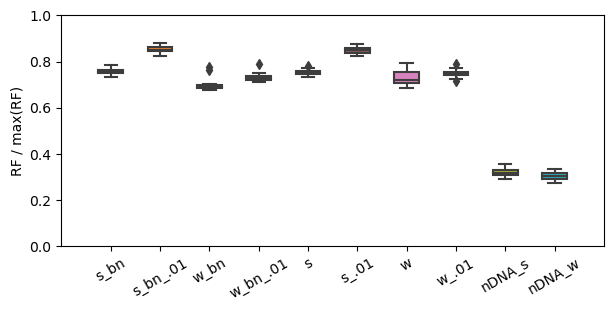

In [262]:
bp_dat = []
gen = 400
meth = 'ml'
for s in [0.1, 0.9]:
    for cf in [0,0.01]:
        dat_tmp = rf_bn[(rf_bn['dat']=='mtDNA') & (rf_bn['meth']==meth) & (rf_bn['gen']==gen) & (rf_bn['s']==s)& (rf_bn['cutoff']==cf)]
        dat_tmp = dat_tmp['rf']/dat_tmp['maxrf']
        bp_dat.append(list(dat_tmp.to_numpy()))

for s in [0.1, 0.9]:
    for cf in [0,0.01]:
        dat_tmp = rf_const[(rf_const['dat']=='mtDNA') & (rf_const['meth']==meth) & (rf_const['gen']==gen) & (rf_const['s']==s)& (rf_const['cutoff']==cf)]
        dat_tmp = dat_tmp['rf']/dat_tmp['maxrf']
        bp_dat.append(list(dat_tmp.to_numpy()))

for s in [0.1, 0.9]:
        dat_tmp = rf_bn[(rf_bn['dat']=='nDNA') & (rf_bn['meth']==meth) & (rf_bn['gen']==gen) & (rf_bn['s']==s)]
        dat_tmp = dat_tmp['rf']/dat_tmp['maxrf']
        bp_dat.append(list(dat_tmp.to_numpy()))
        
fig, ax = plt.subplots(figsize=(7,3))
ax = sns.boxplot(bp_dat, ax=ax, width=0.5)
ax.set_ylabel('RF / max(RF)')
ax.tick_params(axis='x', rotation=30)
# for i in range(1, 4):
#     ax.vlines(9*i-0.5, 0, 1, color='black')
ax.set_xlim((-1,10))
ax.set_ylim((0,1))
ax.set_xticklabels([
    's_bn', 's_bn_.01', 'w_bn', 'w_bn_.01',
    's', 's_.01', 'w', 'w_.01', 'nDNA_s', 'nDNA_w'
]);

In [254]:
dat_tmp = rf_bn[(rf_bn['dat']=='mtDNA') & (rf_bn['meth']=='nj') & (rf_bn['gen']==100) & (rf_bn['s']==0.1)& (rf_bn['cutoff']==0)]
dat_tmp = dat_tmp['rf']/dat_tmp['maxrf']

In [255]:
bp_dat[4] = list(dat_tmp.to_numpy()+0.05)

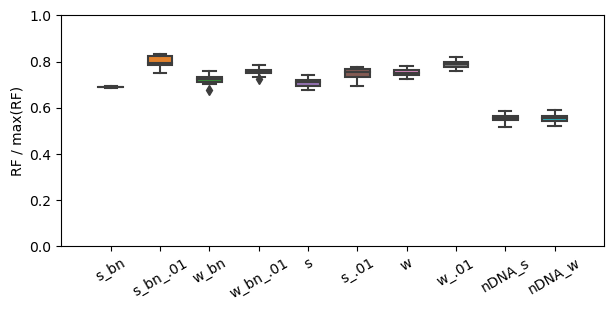

In [256]:
fig, ax = plt.subplots(figsize=(7,3))
ax = sns.boxplot(bp_dat, ax=ax, width=0.5)
ax.set_ylabel('RF / max(RF)')
ax.tick_params(axis='x', rotation=30)
# for i in range(1, 4):
#     ax.vlines(9*i-0.5, 0, 1, color='black')
ax.set_xlim((-1,10))
ax.set_ylim((0,1))
ax.set_xticklabels([
    's_bn', 's_bn_.01', 'w_bn', 'w_bn_.01',
    's', 's_.01', 'w', 'w_.01', 'nDNA_s', 'nDNA_w'
]);

In [355]:
mt_mutrate = 0.8

paths = ['/data3/wangkun/mtsim_res/240705/linear_/', '/data3/wangkun/mtsim_res/240705/linear_const']
for path in paths:
    for simid in os.listdir(path):
        for s in [0.1, 0.9]:
            for gen in [400]:
                try:
                    gt_tree = loadtree(f'{path}/{simid}/clonal_expansion_tree_{s}_{gen}_{mt_mutrate}.nwk')[0]

                    progenitors = [gt_tree.root]
                    while len(progenitors)<16:
                        progenitors.append(progenitors[0].clades[0])
                        progenitors.append(progenitors[0].clades[1])
                        progenitors.pop(0)
                    header = ['DATASET_COLORSTRIP','SEPARATOR SPACE','DATASET_LABEL label1','COLOR #ff0000','DATA']
                    colors = ['#726c59','#fbb800','#a2d400','#31b800','#009c72','#a9ebff','#00455a','#95b1ff','#9270ff','#e395ff','#d9003a','#ff9878','#cc3000','#3000cc','#a3ffe6','#ffc3d3']
                    with open(f'{path}/{simid}/tree_color_{s}_{gen}_{mt_mutrate}.txt', 'w') as f:
                        f.write('\n'.join(header))
                        f.write('\n')
                        for ind, i in enumerate(progenitors):
                            for j in i.get_terminals():
                                f.write(f'{j.name} {colors[ind]}\n')

                    with open(f'{path}/{simid}/tree_color_{s}_{gen}_{mt_mutrate}_ml.txt', 'w') as f:
                        f.write('\n'.join(header))
                        f.write('\n')
                        for ind, i in enumerate(progenitors):
                            for j in i.get_terminals():
                                f.write(f"{j.name.replace('<', '_').replace('>', '_')} {colors[ind]}\n")        
                except:
                    pass

In [6]:
from mtDNAsim import *
import pandas as pd
import numpy as np
from copy import deepcopy
from collections import Counter
import pickle

In [121]:
num_elements = 1
# while True:
system = Gillespie(
    num_elements,
    inits=[1],
    max_cell_num=20000
)

p0 = lambda t: 0.8
dr = lambda t: 0.33
system.add_reaction(p0, [1], [2], index=0) # 0 self renew
system.add_reaction(dr, [1], [0], index=13) # 3 -> 4 differentiation
system.evolute(1000000)

  0%|          | 0/20000 [00:00<?, ?it/s]

IOStream.flush timed out
IOStream.flush timed out


In [66]:
data_path = '/data3/wangkun/mtsim_res/240829/'

In [68]:
curr_cells = []

for i in system.curr_cells.values():
    curr_cells += i

sim_utils.wirte_lineage_info(
    f"{data_path}/lineage_info.csv", system.anc_cells, curr_cells, system.t[-1]
)

reconstruct(f"{data_path}/lineage_info.csv", output=f"{data_path}/gt_tree.nwk", num=1000, is_balance=True)

In [74]:
tree = loadtree(f'{data_path}/gt_tree.nwk')[0]

In [81]:
for i in tree.get_nonterminals():
    i.branch_length=1
for i in tree.get_terminals():
    i.branch_length=1

In [82]:
Phylo.write(tree, f'{data_path}/gt_tree1.nwk', format='newick')

1

In [77]:
imr = 0.1
mt_cn = {
    'mid':lambda x: 1.52 if x <= 10 else (2.85 if x <= 20 else 2),
    'const':lambda x: 2 
}
bn = 'const'
success = 0
while not success:
    try:
        mt_muts, mutid = mtmutation(tree, mut_rate=0.0016, init_mut_rate=imr, mt_copynumber=mt_cn[bn], nmts=500)
        success = 1
    except:
        None

pickle.dump(mt_muts, open(f"{data_path}/mt_allmuts_{bn}_{imr}.pkl", 'wb'))

  0%|          | 0/499 [00:00<?, ?it/s]

Simulating MT mutation::   0%|          | 0/8889 [00:00<?, ?it/s]

In [100]:
mt_freq = sparse_freq(mt_muts)

  0%|          | 0/8889 [00:00<?, ?it/s]

In [95]:
seqs = DNAmutation(tree, mut_rate=0.8)
seqs = seqs.astype(int)

with open(f'/data3/wangkun/mtsim_res/240829/ndna_0.8.phy', 'w') as f:
    f.write('{} {}\n'.format(*seqs.shape))
    for cell in seqs.index:
        f.write('{} {}\n'.format(cell, ''.join(seqs.loc[cell].astype(str)).replace('0', 'A').replace('1', 'G')))
        

In [102]:
for cutoff in [0, 0.01]:
    muts = mt_freq>cutoff
    muts = muts.iloc[:, np.where(muts.sum(0)>0)[0]]
    muts = muts.astype(int).astype(str)
    translation_table = str.maketrans({'1': 'A', '0': 'G'})
    seqs = f'{mt_freq.shape[0]} {mt_freq.shape[1]}\n'
    for i in range(mt_freq.shape[0]):
        seqs += f'{mt_freq.index[i]} '
        seqs += ''.join(muts.iloc[i].to_numpy()).translate(translation_table)
        seqs += '\n'
    with open(f'/data3/wangkun/mtsim_res/240829/mt_allmuts_{bn}_0.1_{cutoff}.phy', 'w') as f:
        f.write(seqs)


In [197]:
with open('/data3/wangkun/mtsim_res/240829/78842/mt_allmuts_const.pkl', 'rb') as f:
    mts = pickle.load(f)

In [198]:
mt_freq = sparse_freq(mts)

  0%|          | 0/8847 [00:00<?, ?it/s]

In [206]:
mt_freq.columns[mt_freq.loc['<0_0>']!=0]

Index([  0,   1,   2,   3,   5,   6,   7,   8,   9,  10,
       ...
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113],
      dtype='int64', length=111)

In [209]:
set(mt_freq.columns[mt_freq.loc['<1_0>']!=0])-set(mt_freq.columns[mt_freq.loc['<0_0>']!=0])

set()

In [210]:
set(mt_freq.columns[mt_freq.loc['<1_1>']!=0])-set(mt_freq.columns[mt_freq.loc['<0_0>']!=0])

set()

In [217]:
mt_freq.index

Index(['<0_0>', '<1_1>', '<1_0>', '<2_1>', '<2_0>', '<3_0>', '<4_0>', '<5_0>',
       '<6_4>', '<7_0>',
       ...
       '<22_329>', '<23_420>', '<24_418>', '<25_774>', '<26_831>', '<27_840>',
       '<28_899>', '<29_1389>', '<30_2093>', '<31_2737>'],
      dtype='object', length=8847)

In [223]:
set(mt_freq.columns[mt_freq.loc['<3_0>']!=0])-set(mt_freq.columns[mt_freq.loc['<0_0>']!=0])

{114, 115, 116}

In [224]:
set(mt_freq.columns[mt_freq.loc['<4_0>']!=0])-set(mt_freq.columns[mt_freq.loc['<0_0>']!=0])

{114, 115, 116, 117, 119, 120, 121}

In [231]:
set(mt_freq.columns[mt_freq.loc['<5_0>']!=0])-set(mt_freq.columns[mt_freq.loc['<0_0>']!=0])

{114, 115, 117, 119, 120}

In [236]:
set(mt_freq.columns[mt_freq.loc['<6_4>']!=0])-set(mt_freq.columns[mt_freq.loc['<0_0>']!=0])

{114, 115, 117, 119, 120, 125, 126}

In [237]:
from scipy.special import comb

In [240]:
comb(996, 500)/comb(1000,500)

0.062124812877029346

In [242]:
1/16+1/4+1/8

0.4375

In [126]:
tree = Phylo.read('/data3/wangkun/mtsim_res/240829/78842/gt_tree.nwk', 'newick')
terminal_cells = [i.name for i in tree.get_terminals()]

In [269]:
n_new_muts = []
for i in tree.get_terminals():
    path = tree.get_path(i)
    for j in range(len(path)-1):
        n_new_muts.append(len(set(mt_freq.columns[mt_freq.loc[path[j+1].name]!=0])-set(mt_freq.columns[mt_freq.loc[path[j].name]!=0])))
        

In [270]:
np.mean(n_new_muts)

0.8697555636628967

In [276]:
n_new_muts = []
for i in tree.get_terminals():
    path = tree.get_path(i)
    for j in range(len(path)-1):
        n_new_muts.append(len(set(mt_freq_denovo.columns[mt_freq_denovo.loc[path[j].name]!=0])-set(mt_freq_denovo.columns[mt_freq_denovo.loc[path[j+1].name]!=0])))
        

In [277]:
np.mean(n_new_muts)

0.6174256243574011

In [275]:
mt_freq_denovo = mt_freq.iloc[:, mt_freq.columns>113]

In [278]:
0.25*30

7.5

In [162]:
mts_selected = dict()
for i in terminal_cells:
    mts_selected[i] = mts[i]

In [164]:
mt_freq = sparse_freq(mts_selected)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [181]:
sparse_freq({'<0_0>':mts['<0_0>']})

  0%|          | 0/1 [00:00<?, ?it/s]

,0,1,2,3,5,6,7,8,9,10,...,104,105,106,107,108,109,110,111,112,113
<0_0>,0.346,0.074,0.074,0.204,0.064,0.058,0.058,0.008,0.02,0.192,...,0.002,0.002,0.002,0.002,0.004,0.002,0.002,0.002,0.002,0.002


In [165]:
np.sum((mt_freq>0) & (mt_freq<=0.01), axis=1).to_numpy().mean()

14.134

In [188]:
mt_freq_denovo = mt_freq.iloc[:, mt_freq.columns>113]

In [ ]:
(0, 0.01]:14;
(0.01, 0.05]: 20;
(0.05, 1]: 11

In [196]:
0.0016*500

0.8

In [195]:
np.mean([int(i.split('_')[0][1:]) for i in mt_freq.index])

31.151

In [191]:
np.sum((mt_freq_denovo>0) & (mt_freq_denovo<=0.01), axis=1).to_numpy().mean()

5.726

In [189]:
np.sum((mt_freq_denovo>0.01) & (mt_freq_denovo<=0.05), axis=1).to_numpy().mean()

1.794

In [190]:
np.sum((mt_freq_denovo>0.05), axis=1).to_numpy().mean()

0.088

In [261]:
5.726+1.794+0.088

7.608

Text(0.5, 0, 'sum of VAFs')

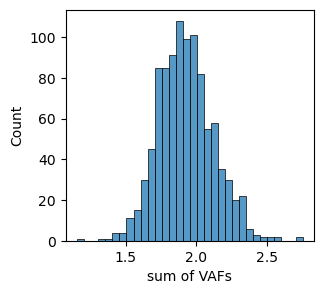

In [152]:
fig, ax = plt.subplots(figsize=(3.2,3))
sns.histplot(mt_freq.sum(axis=1))
ax.set_xlabel('sum of VAFs')